In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

## Creating a set of latitude and longtitude 

In [42]:
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
# Saving the  lats and lngs as a pair zip 

lat_lngs = zip(lats,lngs)
lat_lngs

## we are going to unpack the zip(lats_lngs)



In [43]:
#addign the latitudes and longtitudes in a list
coordinates = list(lat_lngs)


In [44]:
# now we have our ordered pairs of latitude and longtitude in a list "coordinates". we can iterate  through list of tuples and find the nearest city to those coordinates

## 6.1.5 GENERATIGN A RANDOM WORLD CITIES

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

# Get the city weather data 6.2.6

In [46]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [47]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [48]:
#create an empty list to hold the logging 
city_data = []

#PRINT THE BEGINNING OF THE LOGGING

print("Beginning Data Retrival")
print("------------------------")

#Create Counters

record_count = 1
set_count = 1

# We set them to 1 beaucase we want the first iteration of the logging for each recoerded response and the set to start at 1 

#Loop Through the list of cities and build the city url


# LOOP THROUGH ALL THE CITIES IN THE LIST

for i, city in enumerate(cities): #We used enumerate in order to retrive both city name and index number
    
    #GROUP CITIES IN A SETS OF 50 FOR LOGGING PURPOSES
    
    if ( i % 50 == 0 and i  >= 50):
        
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #CREATE ENDPOINT URL FOR EACH CITY.
    
    city_url = url + "&q=" + city.replace(" ","+") #removing the blank space in the city and adding + in orde to concatenate 2 words city names.
    
    
    #LOG THE URL RECORD, SET NUMBERS, CITY.
    print(f"Processing Record {record_count} of set {set_count} | {city}")

    #ADD 1 TO RECORD COUNT.
    record_count += 1
    
    
    #RUN ADN API REQUEST FOR EACH OF THE CITIES
    try:
        #PARDE THE JSON AND RETRIVE DATA.
        city_weather = requests.get(city_url).json()
        #PARDE OUT THE NEEDED DATA
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        
        #CONVERT TO DATE TO ISO STANDARD
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%M-%D %H:%M:%S")
        
        #APPEND THE CITY INFORMATIONS INTO THE CITY LIST
        
        city_data.append({"City":city.title(),
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country": city_country,
                          "Date":city_date})
    except:
        print("City Not Found, skipping...")
        pass
#INDICATE THAT DATA LOADING IS complete.

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")






Beginning Data Retrival
------------------------
Processing Record 1 of set 1 | mount gambier
Processing Record 2 of set 1 | mataura
Processing Record 3 of set 1 | bubaque
Processing Record 4 of set 1 | ferme-neuve
Processing Record 5 of set 1 | le port
Processing Record 6 of set 1 | vuktyl
Processing Record 7 of set 1 | khatanga
Processing Record 8 of set 1 | umm lajj
Processing Record 9 of set 1 | alekseyevsk
Processing Record 10 of set 1 | cam ranh
Processing Record 11 of set 1 | bengkulu
Processing Record 12 of set 1 | pevek
Processing Record 13 of set 1 | shihezi
Processing Record 14 of set 1 | qaanaaq
Processing Record 15 of set 1 | gweta
Processing Record 16 of set 1 | ushuaia
Processing Record 17 of set 1 | sinop
Processing Record 18 of set 1 | hermanus
Processing Record 19 of set 1 | gilgit
Processing Record 20 of set 1 | axim
Processing Record 21 of set 1 | dali
Processing Record 22 of set 1 | rikitea
Processing Record 23 of set 1 | qandala
Processing Record 24 of set 1 | bat

Processing Record 38 of set 4 | barentsburg
City Not Found, skipping...
Processing Record 39 of set 4 | tidore
City Not Found, skipping...
Processing Record 40 of set 4 | palabuhanratu
City Not Found, skipping...
Processing Record 41 of set 4 | tuatapere
Processing Record 42 of set 4 | nikolskoye
Processing Record 43 of set 4 | khilok
Processing Record 44 of set 4 | banda aceh
Processing Record 45 of set 4 | katsuura
Processing Record 46 of set 4 | omboue
Processing Record 47 of set 4 | cleburne
Processing Record 48 of set 4 | vila franca do campo
Processing Record 49 of set 4 | avarua
Processing Record 50 of set 4 | bayanday
Processing Record 1 of set 5 | mareeba
Processing Record 2 of set 5 | te anau
Processing Record 3 of set 5 | taoudenni
Processing Record 4 of set 5 | umtata
Processing Record 5 of set 5 | bardiyah
Processing Record 6 of set 5 | maneadero
Processing Record 7 of set 5 | ribeira grande
Processing Record 8 of set 5 | maceio
Processing Record 9 of set 5 | waipawa
Proce

Processing Record 32 of set 8 | lagoa
Processing Record 33 of set 8 | dnipryany
Processing Record 34 of set 8 | clyde river
Processing Record 35 of set 8 | gurskoye
City Not Found, skipping...
Processing Record 36 of set 8 | tikhvin
Processing Record 37 of set 8 | mount isa
Processing Record 38 of set 8 | talgar
Processing Record 39 of set 8 | tarija
Processing Record 40 of set 8 | port shepstone
Processing Record 41 of set 8 | kavieng
Processing Record 42 of set 8 | yirol
City Not Found, skipping...
Processing Record 43 of set 8 | dicabisagan
Processing Record 44 of set 8 | port-cartier
Processing Record 45 of set 8 | maloshuyka
City Not Found, skipping...
Processing Record 46 of set 8 | callaway
Processing Record 47 of set 8 | nizhneyansk
City Not Found, skipping...
Processing Record 48 of set 8 | amderma
City Not Found, skipping...
Processing Record 49 of set 8 | valparaiso
Processing Record 50 of set 8 | palma del rio
Processing Record 1 of set 9 | chatellerault
Processing Record 2

Processing Record 14 of set 12 | luena
Processing Record 15 of set 12 | ostersund
Processing Record 16 of set 12 | dingle
Processing Record 17 of set 12 | samusu
City Not Found, skipping...
Processing Record 18 of set 12 | nizhniy kuranakh
Processing Record 19 of set 12 | kingston
Processing Record 20 of set 12 | gao
Processing Record 21 of set 12 | shatura
Processing Record 22 of set 12 | vardo
Processing Record 23 of set 12 | conde
Processing Record 24 of set 12 | envira
Processing Record 25 of set 12 | sechura
Processing Record 26 of set 12 | santa marinella
Processing Record 27 of set 12 | broken hill
Processing Record 28 of set 12 | talara
Processing Record 29 of set 12 | bairiki
Processing Record 30 of set 12 | andijon
Processing Record 31 of set 12 | micheweni
Processing Record 32 of set 12 | maragogi
Processing Record 33 of set 12 | tual
Processing Record 34 of set 12 | rio gallegos
Processing Record 35 of set 12 | winston-salem
Processing Record 36 of set 12 | evensk
Processin

## Create a dataframe of City Weather DATA 6.2.7

In [91]:
#Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.8333,140.7667,58.91,88,100,5.75,AU,2022-40-04/08/22 22:40:21
1,Mataura,-46.1927,168.8643,56.66,60,66,6.42,NZ,2022-40-04/08/22 22:40:21
2,Bubaque,11.2833,-15.8333,76.64,79,12,14.41,GW,2022-40-04/08/22 22:40:22
3,Ferme-Neuve,46.7001,-75.4493,35.56,100,100,3.04,CA,2022-40-04/08/22 22:40:22
4,Le Port,-20.9373,55.2919,78.76,70,56,3.56,RE,2022-40-04/08/22 22:40:22
5,Vuktyl,63.8567,57.3094,13.30,96,72,2.86,RU,2022-40-04/08/22 22:40:23
6,Khatanga,71.9667,102.5000,-6.63,100,59,3.76,RU,2022-40-04/08/22 22:40:23
7,Umm Lajj,25.0213,37.2685,85.95,23,1,8.23,SA,2022-40-04/08/22 22:40:23
8,Alekseyevsk,57.8406,108.3492,24.53,96,92,1.81,RU,2022-40-04/08/22 22:40:24
9,Cam Ranh,11.9214,109.1591,71.56,83,20,2.30,VN,2022-40-04/08/22 22:40:24


In [92]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [93]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Gambier,AU,2022-40-04/08/22 22:40:21,-37.8333,140.7667,58.91,88,100,5.75
1,Mataura,NZ,2022-40-04/08/22 22:40:21,-46.1927,168.8643,56.66,60,66,6.42
2,Bubaque,GW,2022-40-04/08/22 22:40:22,11.2833,-15.8333,76.64,79,12,14.41
3,Ferme-Neuve,CA,2022-40-04/08/22 22:40:22,46.7001,-75.4493,35.56,100,100,3.04
4,Le Port,RE,2022-40-04/08/22 22:40:22,-20.9373,55.2919,78.76,70,56,3.56
5,Vuktyl,RU,2022-40-04/08/22 22:40:23,63.8567,57.3094,13.30,96,72,2.86
6,Khatanga,RU,2022-40-04/08/22 22:40:23,71.9667,102.5000,-6.63,100,59,3.76
7,Umm Lajj,SA,2022-40-04/08/22 22:40:23,25.0213,37.2685,85.95,23,1,8.23
8,Alekseyevsk,RU,2022-40-04/08/22 22:40:24,57.8406,108.3492,24.53,96,92,1.81
9,Cam Ranh,VN,2022-40-04/08/22 22:40:24,11.9214,109.1591,71.56,83,20,2.30


# WE ARE GOING TO SAVE THE DATA FRAME AS A CSV FILE 

In [94]:
#create the output file (CSV)

output_data_file = "weather_data/cities.csv"

#EXPORT THE city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# PLOT LATITUDE VS TEMPERATURE 

In [95]:
# Extrat releveant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
cloudiness = city_data_df["Cloudiness"]



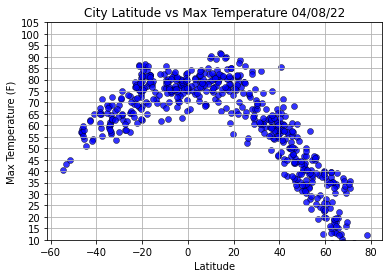

In [96]:
import time

#Build Scatter plot for latitude ss max temperature.

plt.scatter(lats,max_temps, edgecolors="black", c = "blue", alpha= 0.8, label = "Cities", marker = "o", linewidths=0.5)

#INCORPORATE THE OTHER GRAPH PROPERTIES

plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x")) #concatenating
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.yticks(np.arange(10,110, step = 5))
plt.ylim(10)

plt.grid(True)

#Save the figure

plt.savefig("weather_data/fig1.png")

plt.show()


In [97]:
#Scatter PLOT LATITUDE VS HUMIDITy

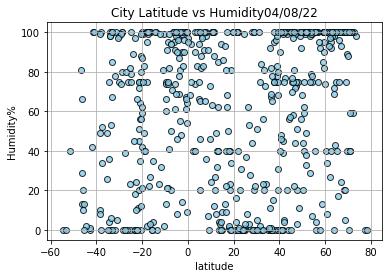

In [98]:
plt.scatter(lats, humidity, edgecolors="black", alpha = 0.8, linewidths=1, c = "skyblue",  label = "Cities")

plt.xlabel("latitude")
plt.ylabel("Humidity%")
plt.title(f"City Latitude vs Humidity" +time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/fig2.png")
plt.show()

In [99]:
#PLOT LATITIDE VS CLOUDINESS

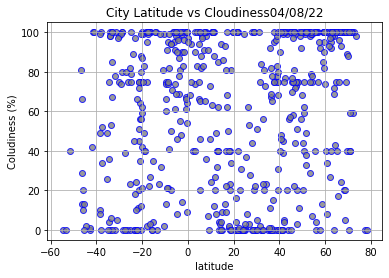

In [100]:
plt.scatter(lats, cloudiness, edgecolors="blue", c = "grey", linewidths=1, alpha=0.8, marker = "o")

plt.title(f"City Latitude vs Cloudiness" + time.strftime("%x"))
plt.xlabel("latitude")
plt.ylabel("Coludiness (%)")
plt.grid(True)

plt.savefig("weather_data/fig3.png")

plt.show()


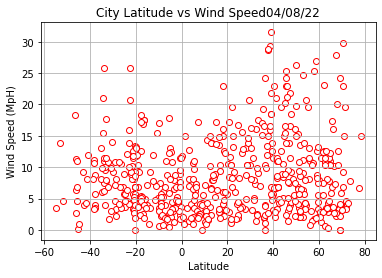

In [102]:
#PLOT LATITUDE VS WIND SPEED

plt.scatter(lats, wind_speed, edgecolors="red", c = "white", marker = "o", linewidths=1, label = "Cities")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MpH)")
plt.grid(True)
plt.title("City Latitude vs Wind Speed" + time.strftime("%x"))
plt.savefig("weather_data/fig4.png")
plt.show()

# CREATE A LINEAR REGRESSION FUNCTION

In [140]:
#CREATE A FUNCTION TO CREATE PERFORM LINEAR REGRESSION ON THE WEATHER DATA
#AND PLOT A REGRESSION LINE AND THE EQUATION WITH THE DATA 
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #RUN REGRESSION ON HEMISPHERE WEATHER DATA
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #CALCULATE THE REGRESSION LINE "y values" from the slope and intercept
    
    regression_values = x_values * slope + intercept
    
    #Get the equation of the line
    
    line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values)
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

    

    
    
    

# CREATE A HEMISPHERE DATAFRAMES

In [141]:
#In order to perform hemisphere based max temp regression analysis and scatter plot 

In [142]:
#To create new datafarame from existing data frame we can use LOC

In [143]:
city_data_df["Lat"] >= 0


0      False
1      False
2       True
3       True
4      False
       ...  
558    False
559    False
560     True
561    False
562     True
Name: Lat, Length: 563, dtype: bool

In [144]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bubaque,GW,2022-40-04/08/22 22:40:22,11.2833,-15.8333,76.64,79,12,14.41
3,Ferme-Neuve,CA,2022-40-04/08/22 22:40:22,46.7001,-75.4493,35.56,100,100,3.04
5,Vuktyl,RU,2022-40-04/08/22 22:40:23,63.8567,57.3094,13.30,96,72,2.86
6,Khatanga,RU,2022-40-04/08/22 22:40:23,71.9667,102.5000,-6.63,100,59,3.76
7,Umm Lajj,SA,2022-40-04/08/22 22:40:23,25.0213,37.2685,85.95,23,1,8.23


In [145]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# PERFORM LINEAR REGRESSION ON THE MAXIMUM TEMPRATURE FOR THE NORTHERN HEMISPHERE

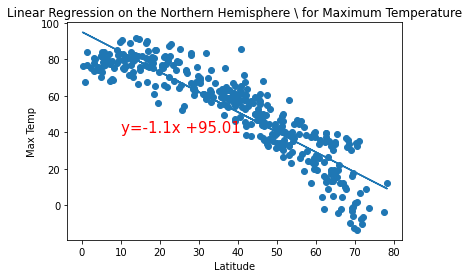

In [146]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))


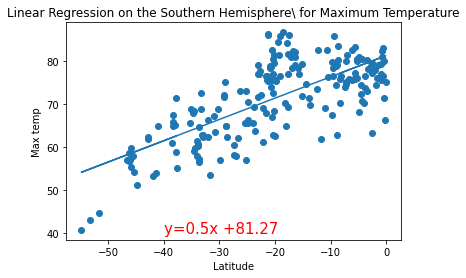

In [147]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere\ for Maximum Temperature","Max temp",(-40,40))

# 6.4.3 Correlation between latitude and percent humidity



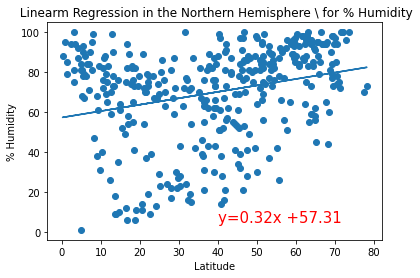

In [150]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,y_values," Linearm Regression in the Northern Hemisphere \ for % Humidity", "% Humidity",(40,5))

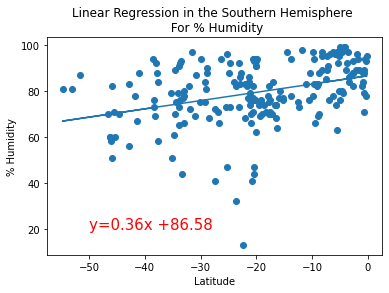

In [154]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values,y_values,"Linear Regression in the Southern Hemisphere \n For % Humidity", "% Humidity", (-50,20))

# 6.4.4 Correlation between latitude and Coludiness

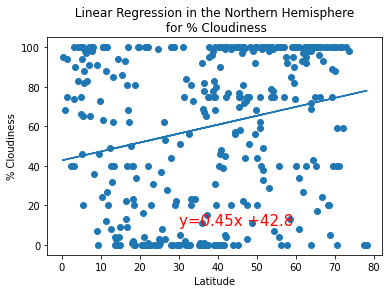

In [160]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,y_values, " Linear Regression in the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (30,10))

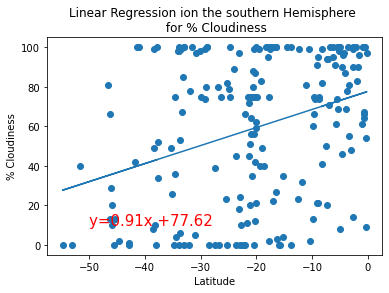

In [161]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,y_values,"Linear Regression ion the southern Hemisphere \n for % Cloudiness","% Cloudiness",(-50,10))

In [ ]:
#Linear regression Latitude vs Wins speed

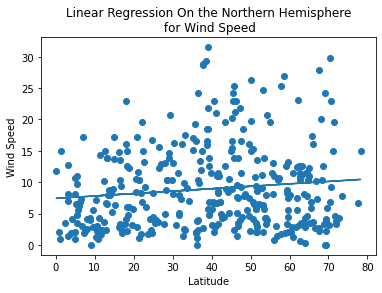

In [162]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,y_values,"Linear Regression On the Northern Hemisphere\n for Wind Speed","Wind Speed",(40,35))

In [168]:
linregress(x_values,y_values)

LinregressResult(slope=-0.06971257674299339, intercept=6.014046380616888, rvalue=-0.1915306639055175, pvalue=0.006728587585345373, stderr=0.025452127865132942, intercept_stderr=0.6140133349875003)

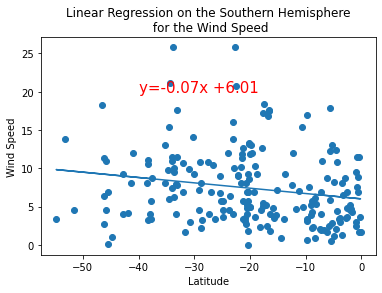

In [165]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the func.

plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere\n for the Wind Speed","Wind Speed",(-40,20))

In [167]:
linregress(x_values,y_values)

LinregressResult(slope=-0.06971257674299339, intercept=6.014046380616888, rvalue=-0.1915306639055175, pvalue=0.006728587585345373, stderr=0.025452127865132942, intercept_stderr=0.6140133349875003)

In [166]:
linregress(x_values,y_values)

LinregressResult(slope=-0.06971257674299339, intercept=6.014046380616888, rvalue=-0.1915306639055175, pvalue=0.006728587585345373, stderr=0.025452127865132942, intercept_stderr=0.6140133349875003)